# <center>**Cleaning Data in Python Part-1**</center>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url_airlines_final = "https://raw.githubusercontent.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/main/16_Cleaning%20Data%20in%20Python%20%5BPart%20-%201%5D/_datasets/airlines_final.csv"
url_banking_dirty = "https://raw.githubusercontent.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/main/16_Cleaning%20Data%20in%20Python%20%5BPart%20-%201%5D/_datasets/banking_dirty.csv"
url_restaurants_L2 = "https://raw.githubusercontent.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/main/16_Cleaning%20Data%20in%20Python%20%5BPart%20-%201%5D/_datasets/restaurants_L2.csv"
url_restaurants_L2_dirty = "https://raw.githubusercontent.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/main/16_Cleaning%20Data%20in%20Python%20%5BPart%20-%201%5D/_datasets/restaurants_L2_dirty.csv"
url_ride_sharing = "https://raw.githubusercontent.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/main/16_Cleaning%20Data%20in%20Python%20%5BPart%20-%201%5D/_datasets/ride_sharing.csv"

# **1️⃣Common data problems**

**Common data types in pandas:**

- `Series`: A one-dimensional labeled array capable of holding any data type. It is similar to a column in a spreadsheet or a database table. Each element in a Series has a unique label called an index.

- `DataFrame`: A two-dimensional labeled data structure consisting of columns. It is similar to a table in a relational database or a spreadsheet. DataFrames are the primary data structure used in pandas and are most commonly used for data analysis and manipulation.

- `Index`: An immutable array or sequence that serves as the row labels for a DataFrame or a Series. It helps in accessing and manipulating data based on the labels.

- `Numeric types`: Pandas supports various numeric types, including int64 (integer), float64 (floating-point), and complex128 (complex number).

- `DateTime`: Pandas provides a DateTime data type for handling dates and times. It includes functionalities for parsing, indexing, and performing operations on dates and times.

- `Categorical`: Categorical data type is used to represent data with a limited set of values. It is useful when dealing with data that has a fixed number of possible categories or levels.

- `Boolean`: Boolean data type represents the truth values True and False. It is often used for filtering and logical operations on data.

- `Text/String`: Pandas provides object data type for storing text or string data. It is a flexible data type that can hold mixed types of data, but it may impact performance compared to other data types.

## **Data type constraints**


#### **Numeric data or ... ?**

In [3]:
ride_sharing = pd.read_csv(url_ride_sharing, index_col='Unnamed: 0')
ride_sharing.head(5)

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male


In [4]:
ride_sharing.isna().sum()

duration           0
station_A_id       0
station_A_name     0
station_B_id       0
station_B_name     0
bike_id            0
user_type          0
user_birth_year    0
user_gender        0
dtype: int64

In [5]:
# Print the information of ride_sharing
ride_sharing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25760 entries, 0 to 25759
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   duration         25760 non-null  object
 1   station_A_id     25760 non-null  int64 
 2   station_A_name   25760 non-null  object
 3   station_B_id     25760 non-null  int64 
 4   station_B_name   25760 non-null  object
 5   bike_id          25760 non-null  int64 
 6   user_type        25760 non-null  int64 
 7   user_birth_year  25760 non-null  int64 
 8   user_gender      25760 non-null  object
dtypes: int64(5), object(4)
memory usage: 2.0+ MB


In [6]:
# Print summary statistics of user_type column
ride_sharing['user_type'].describe()

count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64

In [7]:
# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype =='category'

# Print new summary statistics
print(ride_sharing['user_type_cat'].describe())

count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dtype: int64


`assert ride_sharing['user_type_cat'].dtype =='category'`

The purpose of the code snippet is to validate that the `'user_type_cat'` column in the `'ride_sharing'` DataFrame has been converted to the `'category'` data type. If the conversion is successful, the code will continue executing. If not, an `AssertionError` will be raised.

#### **Summing strings and concatenating numbers**


In [8]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes')

# convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration
display(ride_sharing[['duration', 'duration_trim', 'duration_time']])
print(ride_sharing['duration_time'].mean())

,duration,duration_trim,duration_time
0,12 minutes,12,12
1,24 minutes,24,24
2,8 minutes,8,8
3,4 minutes,4,4
4,11 minutes,11,11
...,...,...,...
25755,11 minutes,11,11
25756,10 minutes,10,10
25757,14 minutes,14,14
25758,14 minutes,14,14


11.389052795031056


## **Data range constraints**


#### **Tire size constraints**


In [9]:
# Generate random tire_sizes data within the specified range
ride_sharing['tire_sizes'] = np.random.randint(26, 30, size=25760)

# Print the resulting DataFrame
ride_sharing.head(5)

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,user_type_cat,duration_trim,duration_time,tire_sizes
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male,2,12,12,29
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male,2,24,24,27
2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male,3,8,8,29
3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male,1,4,4,29
4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male,2,11,11,26


In [10]:
# convert tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())

count     25760
unique        2
top          27
freq      19317
Name: tire_sizes, dtype: int64


#### **Back to the future**

In [11]:
# No date for tire_sizes: fill it randomly
sz = len(ride_sharing['duration_time'])
ride_sharing['ride_date']  = np.random.choice(
    a=['2020-01-01', '2021-01-01'],  
    size=sz,  
    p=[0.9, 0.1]  
 )

In [12]:
import datetime as dt

# Convert ride_date to date
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date']).dt.date

# Save today's date
today = dt.date.today()

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())

2021-01-01


## **Uniqueness constraints**


#### **Finding duplicates**


In [13]:
# Find duplicates
duplicates = ride_sharing.duplicated(subset='bike_id', keep=False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values('bike_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['bike_id', 'duration', 'user_birth_year']])

       bike_id    duration  user_birth_year
3638        11  12 minutes             1988
6088        11   5 minutes             1985
10857       11   4 minutes             1987
10045       27  13 minutes             1989
16104       27  10 minutes             1970
...        ...         ...              ...
8812      6638  10 minutes             1986
6815      6638   5 minutes             1995
8456      6638   7 minutes             1983
8300      6638   6 minutes             1962
8380      6638   8 minutes             1984

[25717 rows x 3 columns]


#### **Treating duplicates**


In [14]:
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates().copy()

ride_dup['duration'] = ride_dup['duration'].str.replace(" minutes", "").astype('int')

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('bike_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'bike_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

# **2️⃣Text and categorical data problems**

## **Membership constraints**


#### **Finding consistency**

In [15]:
airlines = pd.read_csv(url_airlines_final)
display(airlines.head(5))

categories = pd.DataFrame(
    {
        'cleanliness': ['Clean', 'Average', 'Somewhat clean', 'Somewhat dirty', 'Dirty'],
        'safety': ['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe', 'Somewhat unsafe'],
        'satisfaction': ['Very satisfied', 'Neutral', 'Somewhat satisfied', 'Somewhat unsatisfied', 'Very unsatisfied']
    }
)

airlines = airlines.drop(labels=['Unnamed: 0'], axis=1)

print("\n")
display(airlines.head(5))

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified


,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified


In [16]:
# Print categories DataFrame
print(categories, "\n")

# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), '\n')
print('Satisfaction: ', airlines['satisfaction'].unique(), '\n')

      cleanliness           safety          satisfaction
0           Clean          Neutral        Very satisfied
1         Average        Very safe               Neutral
2  Somewhat clean    Somewhat safe    Somewhat satisfied
3  Somewhat dirty      Very unsafe  Somewhat unsatisfied
4           Dirty  Somewhat unsafe      Very unsatisfied 

Cleanliness:  ['Clean' 'Average' 'Somewhat clean' 'Somewhat dirty' 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 



In [17]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

# Print rows with consistent categories only
print(airlines[~cat_clean_rows])

Empty DataFrame
Columns: [id, day, airline, destination, dest_region, dest_size, boarding_area, dept_time, wait_min, cleanliness, safety, satisfaction]
Index: []
        id        day        airline        destination    dest_region  \
0     1351    Tuesday    UNITED INTL             KANSAI           Asia   
1      373     Friday         ALASKA  SAN JOSE DEL CABO  Canada/Mexico   
2     2820   Thursday          DELTA        LOS ANGELES        West US   
3     1157    Tuesday      SOUTHWEST        LOS ANGELES        West US   
4     2992  Wednesday       AMERICAN              MIAMI        East US   
...    ...        ...            ...                ...            ...   
2472  1475    Tuesday         ALASKA       NEW YORK-JFK        East US   
2473  2222   Thursday      SOUTHWEST            PHOENIX        West US   
2474  2684     Friday         UNITED            ORLANDO        East US   
2475  2549    Tuesday        JETBLUE         LONG BEACH        West US   
2476  2162   Saturday  C

## **Categorical Variable**

#### **Inconsistent categories**

In [18]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


In [19]:
# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

In [20]:
# Remove white spaces from 'dest_size'
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']


#### **Remapping categories**

In [21]:
# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], 
                               bins=label_ranges,
                               labels=label_names)

# Create mappings and replace
mappings = {
    'Monday': 'weekday',
    'Tuesday': 'weekday',
    'Wednesday': 'weekday',
    'Thursday': 'weekday',
    'Friday': 'weekday',
    'Saturday': 'weekend',
    'Sunday': 'weekend'
}

airlines['day_week'] = airlines['day'].replace(mappings)

## **Cleaning text data**

#### **Removing titles and taking names**

In [22]:
import pandas as pd
import random
import re

# Generate random data
data = {
    'id': range(1, 11),
    'full_name': [random.choice(['Mr. John Doe', 'Dr. Jane Smith', 'Miss Emily Brown', 'Ms. Alex Johnson']) for _ in range(1, 11)]
}

# Create DataFrame
my_data = pd.DataFrame(data)

# Define a function to remove titles and extract names
def remove_titles(full_name):
    title_pattern = r'(?:Mr\.|Mrs\.|Ms\.|Miss|Dr\.)\s'
    name = re.sub(title_pattern, '', full_name)
    return name

# Apply the function to the 'full_name' column
my_data['full_name'] = my_data['full_name'].apply(remove_titles)

# Assert that 'full_name' has no honorifics
assert my_data['full_name'].str.contains(r'(?:Mr\.|Mrs\.|Ms\.|Miss|Dr\.)').any() == False

print(my_data)

   id     full_name
0   1    Jane Smith
1   2  Alex Johnson
2   3   Emily Brown
3   4  Alex Johnson
4   5  Alex Johnson
5   6   Emily Brown
6   7  Alex Johnson
7   8   Emily Brown
8   9   Emily Brown
9  10    Jane Smith


#### **Keeping it descriptive**

In [23]:
import pandas as pd
import random

random.seed(123)

# Generate random data
data = {
    'id': range(1, 11),
    'survey_response': [random.choice(['The flight was great!', 'I had a pleasant experience.', 'It was an average flight.']) for _ in range(1, 11)]
}

# Create DataFrame
my_data = pd.DataFrame(data)
print(my_data, "\n")

# Store length of each row in survey_response column
resp_length = my_data['survey_response'].str.len()

# Find rows in my_data where resp_length > 25
my_data_survey = my_data[resp_length > 25]

# Check if the series is not empty and the minimum survey_response length is > 40
if not my_data_survey.empty:
    min_length = my_data_survey['survey_response'].str.len().min()
    assert min_length > 25, f"Minimum survey_response length is {min_length}"
else:
    print("No rows found with survey_response length > 40")

# Print new survey_response column
print(my_data_survey['survey_response'])

   id               survey_response
0   1         The flight was great!
1   2  I had a pleasant experience.
2   3         The flight was great!
3   4  I had a pleasant experience.
4   5  I had a pleasant experience.
5   6         The flight was great!
6   7         The flight was great!
7   8  I had a pleasant experience.
8   9     It was an average flight.
9  10     It was an average flight. 

1    I had a pleasant experience.
3    I had a pleasant experience.
4    I had a pleasant experience.
7    I had a pleasant experience.
Name: survey_response, dtype: object


# **3️⃣Advanced data problems**

## **Uniformity**


#### **Uniform currencies**


In [24]:
import pandas as pd
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Define the number of rows in the dataset
num_rows = 97

# Generate random data
cust_ids = [''.join(np.random.choice(list('0123456789ABCDEF'), 8)) for _ in range(num_rows)]
acct_amounts = np.random.uniform(10000, 100000, num_rows).round(2)
acct_currencies = np.random.choice(['dollar', 'euro'], num_rows)
inv_amounts = np.random.uniform(5000, 80000, num_rows).round(2)
account_opened_dates = pd.date_range(start='2017-01-01', end='2019-12-31', periods=num_rows).strftime('%d-%m-%y')
last_transaction_dates = pd.date_range(start='2018-01-01', end='2020-12-31', periods=num_rows).strftime('%d-%m-%y')

# Create the DataFrame
banking = pd.DataFrame({
    'cust_id': cust_ids,
    'acct_amount': acct_amounts,
    'acct_cur': acct_currencies,
    'inv_amount': inv_amounts,
    'account_opened': account_opened_dates,
    'last_transaction': last_transaction_dates
})

# Display the DataFrame
display(banking)

,cust_id,acct_amount,acct_cur,inv_amount,account_opened,last_transaction
0,63CEA7C4,77555.33,euro,48886.21,01-01-17,01-01-18
1,6926AA74,82615.13,dollar,59459.06,12-01-17,12-01-18
2,37725417,99145.46,dollar,61781.09,23-01-17,23-01-18
3,BD51FB40,47135.59,dollar,33338.79,04-02-17,04-02-18
4,B95CB80A,43481.63,euro,23081.36,15-02-17,15-02-18
...,...,...,...,...,...,...
92,BCCBED1C,66645.88,dollar,44844.93,15-11-19,15-11-20
93,2126097C,72617.38,dollar,59038.70,26-11-19,26-11-20
94,999D1286,50908.70,euro,9675.60,08-12-19,08-12-20
95,3941CAC7,66480.23,dollar,16080.43,19-12-19,19-12-20


In [25]:
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1 

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

#### **Uniform dates**


In [26]:
# Print the header of account_opend
print(banking['account_opened'].head())

# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce')  

# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'])

0    01-01-17
1    12-01-17
2    23-01-17
3    04-02-17
4    15-02-17
Name: account_opened, dtype: object
0     2017
1     2017
2     2017
3     2017
4     2017
      ... 
92    2019
93    2019
94    2019
95    2019
96    2019
Name: acct_year, Length: 97, dtype: object


## **Cross field validation**


#### **How's our data integrity?**


In [27]:
banking = pd.read_csv(url_banking_dirty)
banking.head()

,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18


In [28]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis = 1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


In [34]:
banking.columns

Index(['Unnamed: 0', 'cust_id', 'birth_date', 'Age', 'acct_amount',
       'inv_amount', 'fund_A', 'fund_B', 'fund_C', 'fund_D', 'account_opened',
       'last_transaction'],
      dtype='object')

In [36]:
import pandas as pd
import datetime as dt

# Convert 'birth_date' column to datetime type
banking['birth_date'] = pd.to_datetime(banking['birth_date'])

today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = banking['Age'] == ages_manual

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

Number of inconsistent ages:  100


## **Completeness**


#### **Is this missing at random?**


Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
dtype: int64


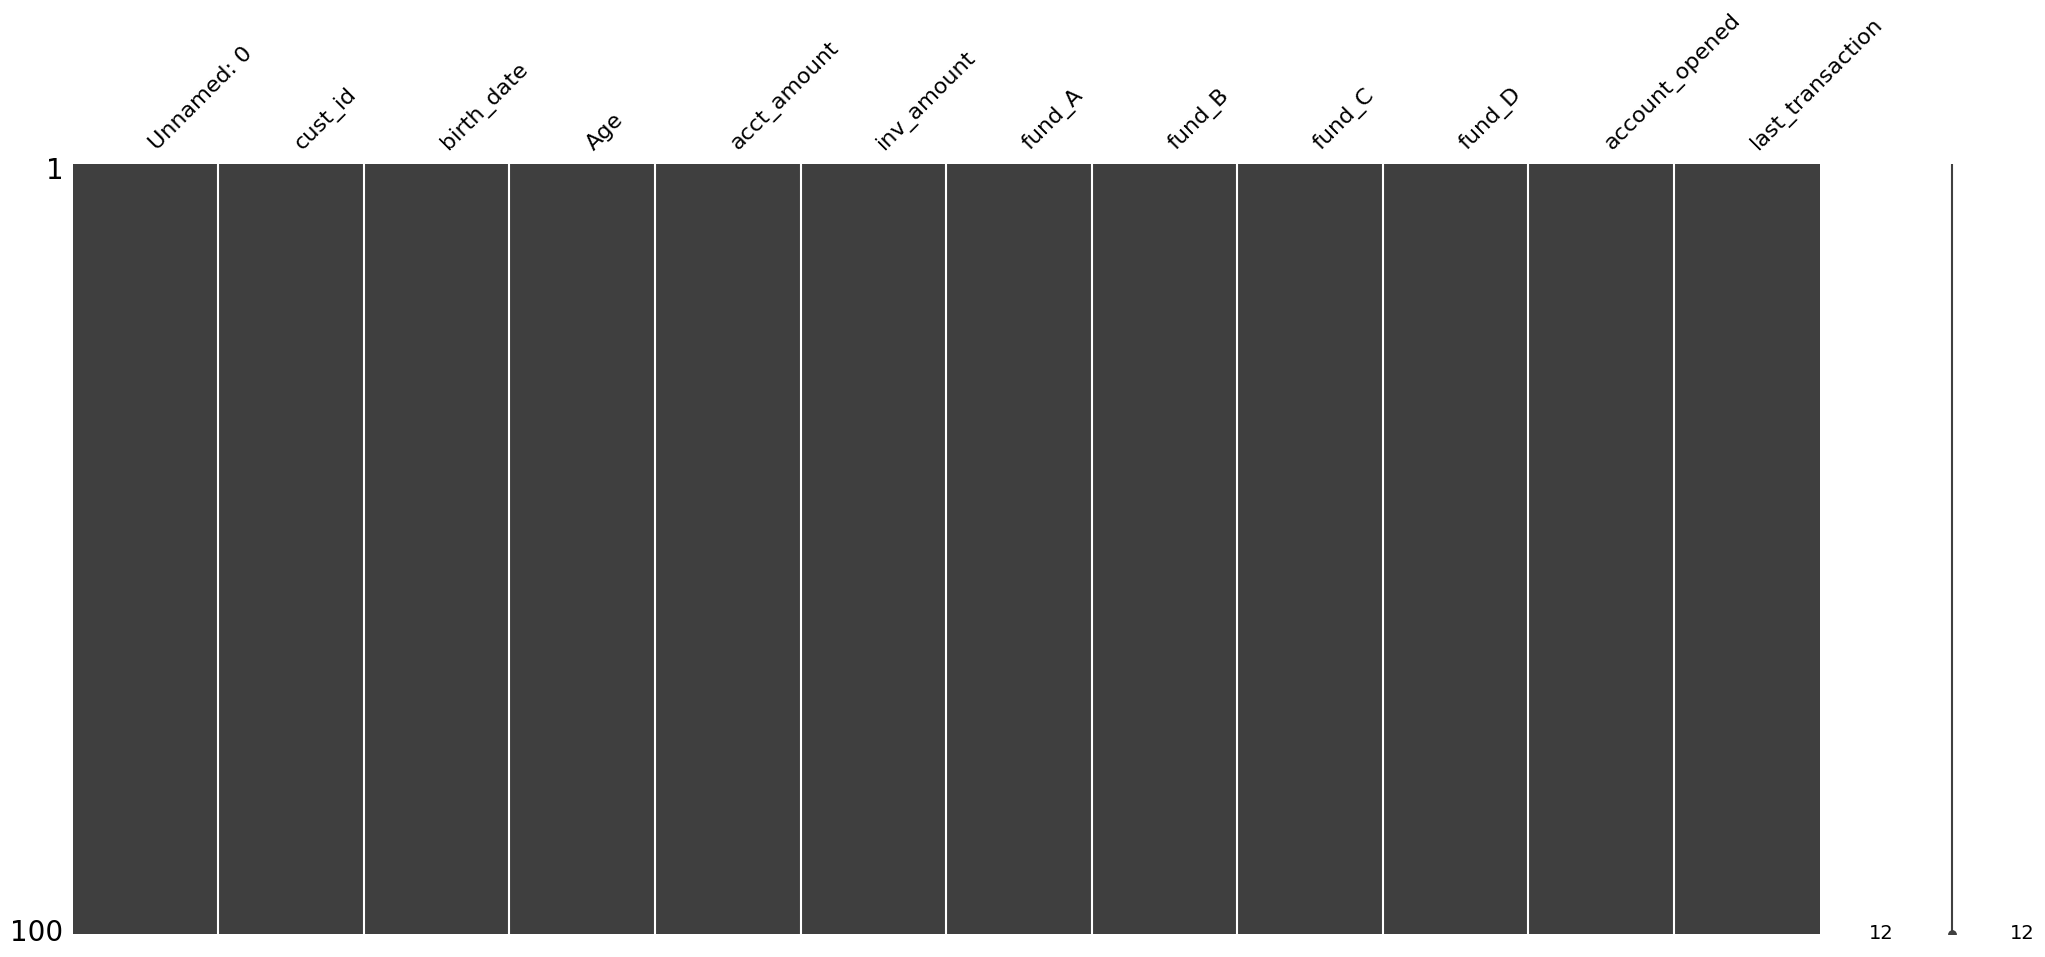

In [37]:
import missingno as msno

# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

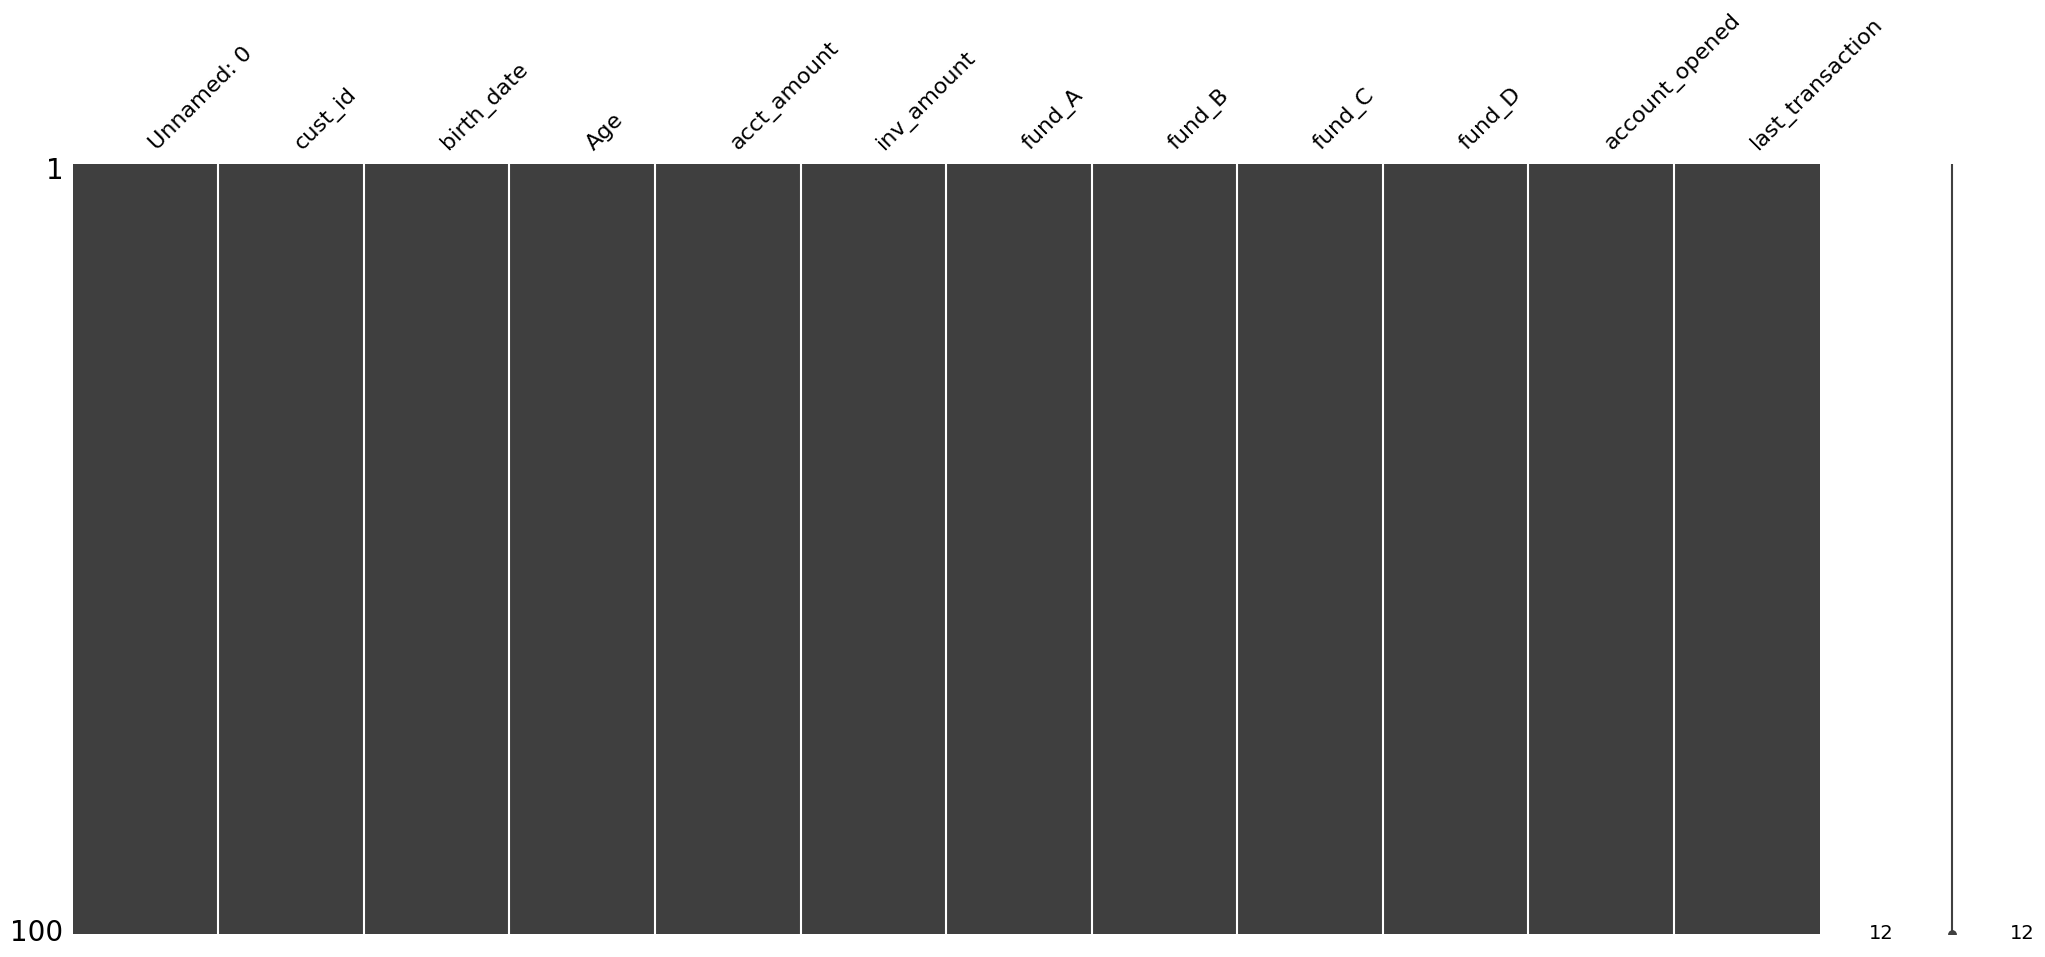

In [38]:
# Isolate missing and non-missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

# Sort banking by age and visualize
banking_sorted = banking.sort_values(by='Age')
msno.matrix(banking_sorted)
plt.show()

#### **Missing investors**


<Axes: >

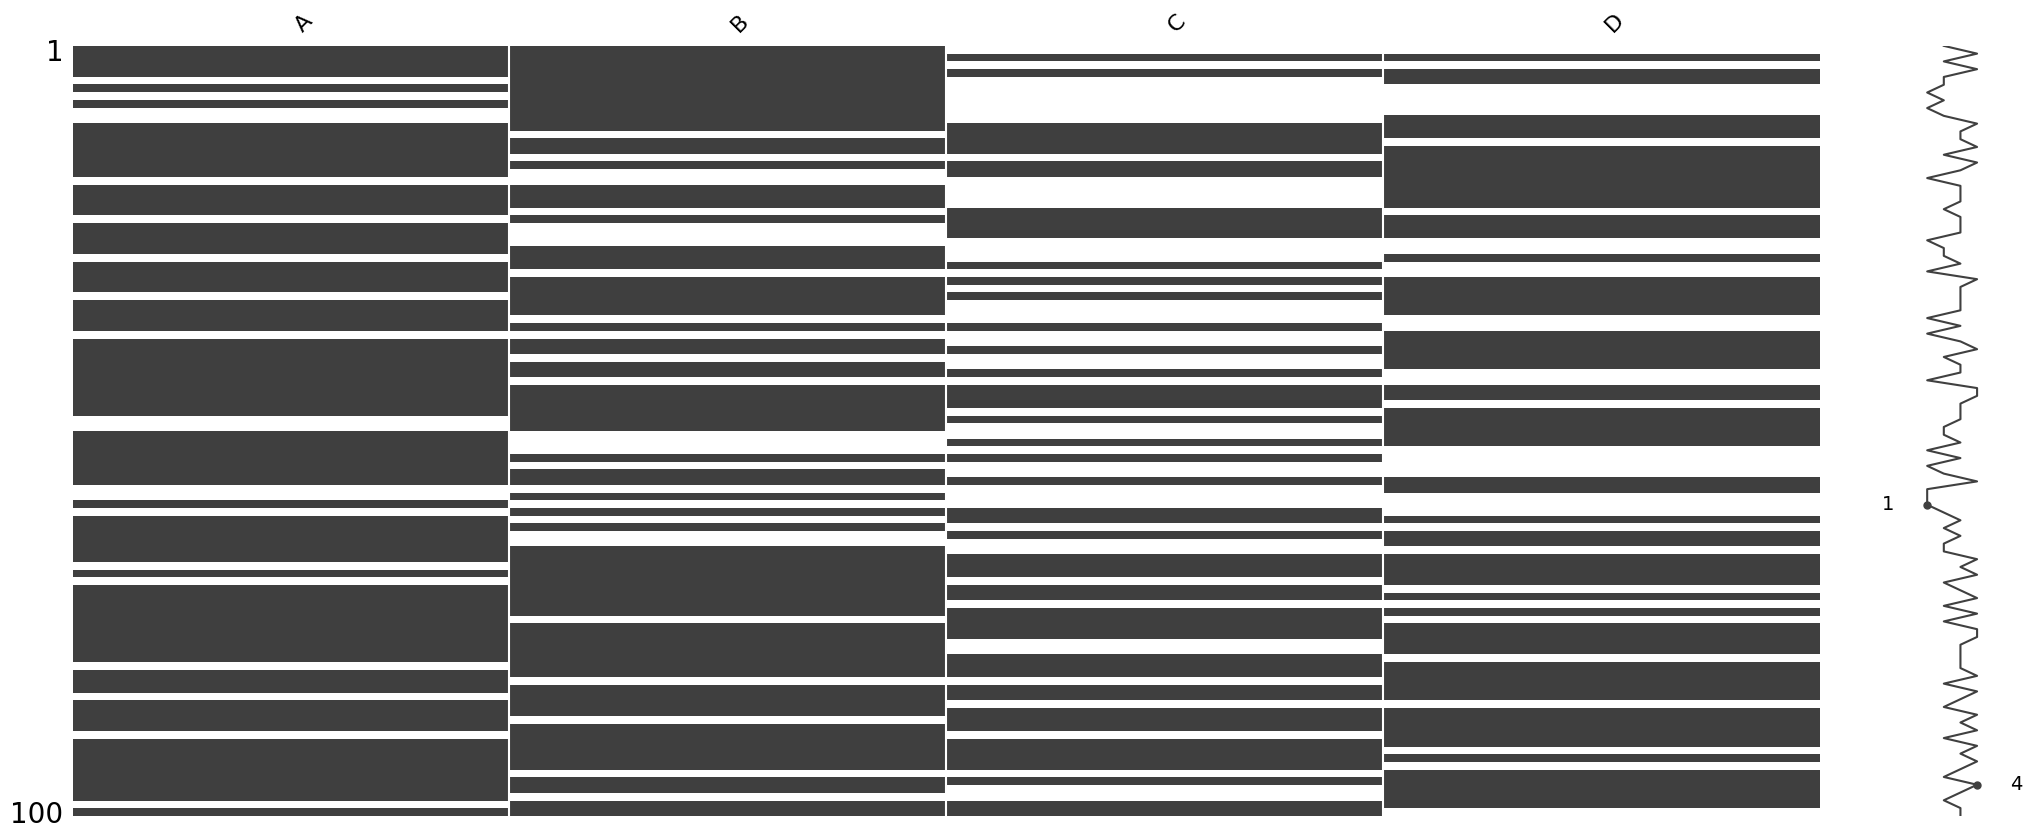

In [39]:
import pandas as pd
import missingno as msno
import random

# Generate a random DataFrame with complete and missing data
random.seed(42)  # Set a seed for reproducibility

data = {
    'A': [random.randint(1, 10) if random.random() > 0.2 else None for _ in range(100)],
    'B': [random.choice(['A', 'B', 'C', None]) for _ in range(100)],
    'C': [random.uniform(0, 1) if random.random() > 0.5 else None for _ in range(100)],
    'D': [random.choice([True, False, None]) for _ in range(100)]
}
df = pd.DataFrame(data)

# Visualize missing data using missingno library
msno.matrix(df)  # Matrix plot

 `msno.matrix()` is a function from the `missingno` library that creates a matrix plot, a visual representation of missing data in a DataFrame. It displays missing values as light-colored cells and non-missing values as dark-colored cells.

#### **Follow the money**

In [40]:
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount'] * 5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
dtype: int64


# **4️⃣Record linkage**

## **Comparing strings**

### The cutoff point

In [41]:
import pandas as pd
import random

# Create a list of cuisine types
cuisine_types = ['american', 'merican', 'amurican', 'american', 'american', 'italian', 'asian', 'asian']

# Generate random data for each column
num_rows = 287
rest_name = ['restaurant' + str(i) for i in range(num_rows)]
rest_addr = [str(random.randint(100, 999)) + ' street' for _ in range(num_rows)]
city = ['los angeles', 'studio city', 'hollywood', 'san francisco'] * (num_rows // 4) + ['los angeles'] * (num_rows % 4)  # Adjusted to match num_rows
phone = [str(random.randint(1000000000, 9999999999)) for _ in range(num_rows)]
cuisine_type = [random.choice(cuisine_types) for _ in range(num_rows)]

# Create the DataFrame
data = {
    'rest_name': rest_name,
    'rest_addr': rest_addr,
    'city': city,
    'phone': phone[:num_rows],
    'cuisine_type': cuisine_type[:num_rows]
}
restaurants = pd.DataFrame(data)

# Print the DataFrame
display(restaurants)

,rest_name,rest_addr,city,phone,cuisine_type
0,restaurant0,577 street,los angeles,4576111591,amurican
1,restaurant1,525 street,studio city,2272368870,merican
2,restaurant2,163 street,hollywood,2549972386,merican
3,restaurant3,311 street,san francisco,2298229437,american
4,restaurant4,952 street,los angeles,5838636972,italian
...,...,...,...,...,...
282,restaurant282,878 street,hollywood,1454678712,merican
283,restaurant283,637 street,san francisco,5632753983,asian
284,restaurant284,711 street,los angeles,9033841191,italian
285,restaurant285,389 street,los angeles,8498174646,amurican


In [42]:
!pip install thefuzz -q

In [43]:
# Import process from thefuzz
from thefuzz import process

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants['cuisine_type'].unique()

# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit = len(unique_types)))

# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit = len(unique_types)))

# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian', unique_types, limit = len(unique_types)))

[('asian', 100), ('italian', 67), ('amurican', 62), ('american', 62), ('merican', 50)]
[('american', 100), ('merican', 93), ('amurican', 88), ('asian', 62), ('italian', 53)]
[('italian', 100), ('asian', 67), ('merican', 43), ('amurican', 40), ('american', 40)]


/usr/local/lib/python3.10/dist-packages/thefuzz/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## **Generating pairs**

### Pairs of restaurants

In [44]:
restaurants = pd.read_csv(url_restaurants_L2_dirty)
restaurants_new = pd.read_csv(url_restaurants_L2)

In [45]:
!pip install recordlinkage -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.5/926.5 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 59.5 MB/s eta 0:00:00


In [46]:
import recordlinkage

In [51]:
import pandas as pd
import recordlinkage

# Create sample dataframes
data_1 = pd.DataFrame({'Name': ['John Doe', 'Jane Smith', 'Alice Johnson'],
                      'Address': ['123 Main St', '456 Elm St', '789 Oak St']})

data_2 = pd.DataFrame({'Name': ['John Doe', 'Jane Smith', 'Alice J. Johnson'],
                      'Address': ['123 Main Street', '456 Elm Street', '789 Oak St']})

# Initialize the indexer
indexer = recordlinkage.Index()

# Block on the 'Name' field
indexer.block('Name')

# Perform indexing
candidates = indexer.index(data_1, data_2)

# Initialize the comparer
comparer = recordlinkage.Compare()

# Compare the 'Name' field using the Jaro-Winkler metric
comparer.string('Name', 'Name', method='jarowinkler')

# Compare the 'Address' field using the exact match method
comparer.exact('Address', 'Address')

# Compute the similarity
similarity = comparer.compute(candidates, data_1, data_2)

# Link records above a certain threshold
potential_matches = similarity[similarity.sum(axis=1) >= 1]

# Print the potential matches
print(potential_matches)

       0  1
0 0  1.0  0
1 1  1.0  0


#### $\color{skyblue}{\textbf{Connect with me:}}$


[<img align="left" src="https://cdn4.iconfinder.com/data/icons/social-media-icons-the-circle-set/48/twitter_circle-512.png" width="32px"/>][twitter]
[<img align="left" src="https://cdn-icons-png.flaticon.com/512/145/145807.png" width="32px"/>][linkedin]
[<img align="left" src="https://cdn2.iconfinder.com/data/icons/whcompare-blue-green-web-hosting-1/425/cdn-512.png" width="32px"/>][Portfolio]

[twitter]: https://twitter.com/F4izy
[linkedin]: https://www.linkedin.com/in/mohd-faizy/
[Portfolio]: https://mohdfaizy.com/